In [25]:
# Check the versions of libraries
 
# Python version
import sys
print('Python: {}'.format(sys.version))
# scipy
import scipy
print('scipy: {}'.format(scipy.__version__))
# numpy
import numpy as np
print('numpy: {}'.format(np.__version__))
# matplotlib
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))
# pandas
import pandas as pd
print('pandas: {}'.format(pd.__version__))
# scikit-learn
import sklearn
print('sklearn: {}'.format(sklearn.__version__))

import statsmodels.formula.api as smf
import statsmodels.stats.api as sms
from scipy import stats
from statsmodels.compat import lzip
import statsmodels
import matplotlib.pyplot as plt

%matplotlib inline
import matplotlib.pyplot as plt

from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import cross_val_score
from sklearn import metrics

%matplotlib inline
import seaborn as sns

# Load libraries

from pandas.plotting import scatter_matrix
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

Python: 3.6.5 |Anaconda, Inc.| (default, Apr 29 2018, 16:28:17) 
[GCC 7.2.0]
scipy: 1.1.0
numpy: 1.14.3
matplotlib: 2.2.2
pandas: 0.23.0
sklearn: 0.19.1


In [11]:
# read CSV of analytics staff data

data = pd.read_csv('defensivedata.csv', header=0)
data = data.dropna()

In [12]:
# Look at the variable names 

variablenames = data.keys()
print (variablenames) 

Index(['Year', 'Player', 'TEAM', 'AGE', 'GP', 'W', 'L', 'MIN', 'DEFRTG',
       'DREB', 'DREB%', '%DREB', 'STL', 'STL%', 'BLK', '%BLK',
       'OPP PTS\nOFF TOV ', 'OPP PTS\n2ND CHANCE ', 'OPP PTS\nFB ',
       'OPP PTS\nPAINT ', 'DEFWS', 'All Defense', 'DPOY', 'Over5', 'Over4',
       'Over3', 'Under3', 'Under100'],
      dtype='object')


In [4]:
# describe Staff and WIns 

data.describe()

,Year,AGE,GP,W,L,MIN,DEF RTG,DREB,DREB%,%DREB,...,OPP PTS FB,OPP PTS PAINT,DEF WS,All Defense,DPOY,Over5,Over4,Over3,Under3,Under100
count,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,...,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,2018.509259,27.657407,30.916667,15.481481,15.435185,699.787037,99.532407,89.722222,12.552778,19.869444,...,146.587963,569.101852,2.584259,0.092593,0.009259,0.069444,0.185185,0.314815,0.648148,0.509259
std,0.501076,3.872772,3.885872,5.914871,5.620185,238.669824,4.602210,51.960868,5.119683,7.941173,...,60.768119,207.578618,1.409909,0.290534,0.096001,0.254799,0.389350,0.465521,0.478657,0.501076
min,2018.000000,20.000000,16.000000,3.000000,4.000000,251.000000,87.000000,18.000000,3.600000,5.900000,...,42.000000,158.000000,-0.100000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2018.000000,25.000000,29.000000,11.000000,11.000000,479.500000,96.000000,50.000000,8.300000,13.275000,...,97.750000,401.000000,1.600000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,2019.000000,27.000000,32.000000,16.000000,14.000000,688.500000,99.000000,77.500000,11.400000,18.300000,...,145.500000,558.000000,2.300000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
75%,2019.000000,30.000000,34.000000,20.000000,19.000000,892.750000,102.250000,116.250000,16.400000,25.725000,...,196.250000,732.500000,3.425000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
max,2019.000000,38.000000,35.000000,26.000000,28.000000,1131.000000,112.000000,282.000000,26.800000,40.300000,...,327.000000,984.000000,6.100000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [61]:
y=data['All Defense']

data["constant"] = 1.0

x=data[['DEFWS', 'STL', 'BLK', 'constant']]


In [62]:
import statsmodels.api as sm

logit_model=sm.Logit(y,x)
result=logit_model.fit(method='bfgs')
print(result.summary2())

params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']

print(np.exp(conf))


Optimization terminated successfully.
         Current function value: 0.186470
         Iterations: 21
         Function evaluations: 25
         Gradient evaluations: 25
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.396     
Dependent Variable: All Defense      AIC:              88.5553   
Date:               2019-10-30 21:51 BIC:              102.0564  
No. Observations:   216              Log-Likelihood:   -40.278   
Df Model:           3                LL-Null:          -66.635   
Df Residuals:       212              LLR p-value:      2.1089e-11
Converged:          1.0000           Scale:            1.0000    
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
DEFWS          0.6868    0.2756   2.4917  0.0127   0.1466   1.2270
STL            0.0651    0.0269   2.4208  0.0155   0.0124 

In [92]:
y=data['All Defense']

data["constant"] = 1.0

x=data[['Over3', 'constant']]

In [93]:
import statsmodels.api as sm

logit_model=sm.Logit(y,x)
result=logit_model.fit(method='bfgs')
print(result.summary2())

params = result.params
conf = result.conf_int()
conf['OR'] = params
conf.columns = ['2.5%', '97.5%', 'OR']

print(np.exp(conf))

Optimization terminated successfully.
         Current function value: 0.230987
         Iterations: 14
         Function evaluations: 15
         Gradient evaluations: 15
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.251     
Dependent Variable: All Defense      AIC:              103.7865  
Date:               2019-10-30 22:41 BIC:              110.5370  
No. Observations:   216              Log-Likelihood:   -49.893   
Df Model:           1                LL-Null:          -66.635   
Df Residuals:       214              LLR p-value:      7.1869e-09
Converged:          1.0000           Scale:            1.0000    
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Over3          3.2691    0.7632   4.2831  0.0000   1.7731   4.7650
constant      -4.2908    0.7120  -6.0260  0.0000  -5.6863 

In [29]:
data['All Defense'].value_counts()

0    196
1     20
Name: All Defense, dtype: int64

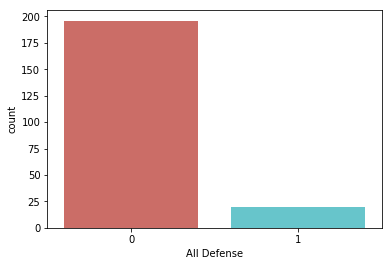

<Figure size 432x288 with 0 Axes>

In [31]:
sns.countplot(x='All Defense', data=data, palette='hls') 
plt.show() 
plt.savefig('count_plot')

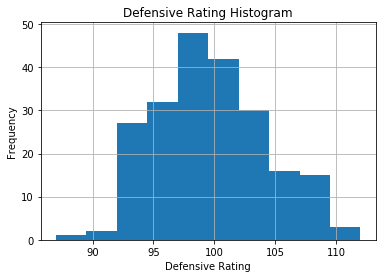

In [39]:
data.DEFRTG.hist()
plt.title('Defensive Rating Histogram')
plt.xlabel('Defensive Rating')
plt.ylabel('Frequency')
plt.savefig('hist_defrtg')

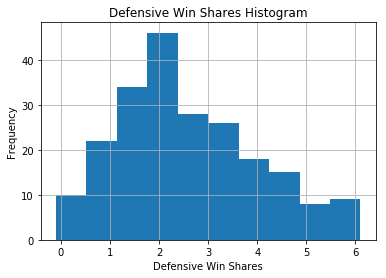

In [40]:
data.DEFWS.hist()
plt.title('Defensive Win Shares Histogram')
plt.xlabel('Defensive Win Shares')
plt.ylabel('Frequency')
plt.savefig('hist_defws')

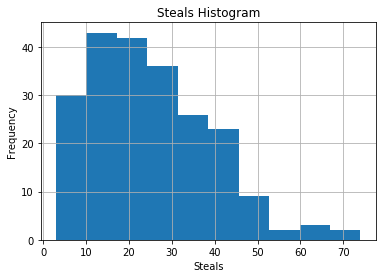

In [41]:
data.STL.hist()
plt.title('Steals Histogram')
plt.xlabel('Steals')
plt.ylabel('Frequency')
plt.savefig('hist_steals')

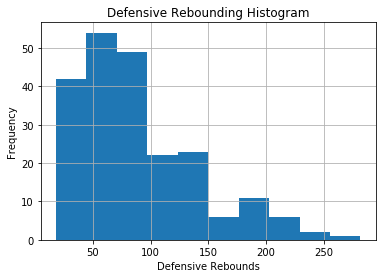

In [42]:
data.DREB.hist()
plt.title('Defensive Rebounding Histogram')
plt.xlabel('Defensive Rebounds')
plt.ylabel('Frequency')
plt.savefig('hist_dreb')

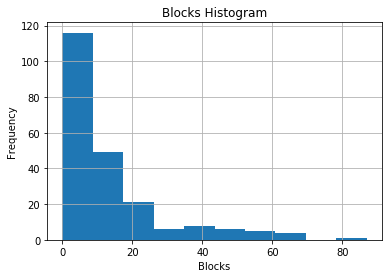

In [43]:
data.BLK.hist()
plt.title('Blocks Histogram')
plt.xlabel('Blocks')
plt.ylabel('Frequency')
plt.savefig('hist_blocks')

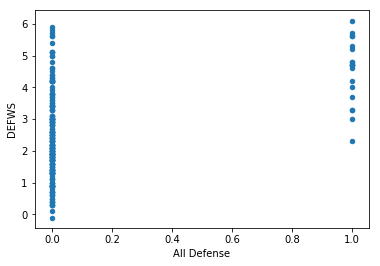

In [83]:
data.plot.scatter('All Defense', 'DEFWS')

In [53]:
data['All Defense'].corr(data['DEFWS'])

0.43845740380638404